In [1]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules



"""

'\nPurpose: To Run the proofreading of neurons in the \ntest set and measure the precision and recall of the new rules\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-25 20:43:16,906 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:43:16,909 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:43:16,957 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:43:16,979 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-25 20:43:16,980 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:43:16,994 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-25 20:43:17,424 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:43:17,427 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:43:17,428 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:43:17,428 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:43:17,429 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:43:17,429 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:43:17,430 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:43:17,431 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:43:17,986 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-25 20:43:18,174 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:43:18,175 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:43:18,176 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:43:18,179 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:43:18,848 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [6]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [7]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [8]:
job_idx = 5
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

array([864691136618412685, 864691136545546146, 864691136537477538,
       864691136105491417, 864691136056340440])


--- Working on Neuron 864691136618412685 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 134, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 1765, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 1899
n_valid_syn_ids_presyn = 134
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 1765
n_errored_syn_ids_postsyn = 0
Segment Id = 864691136618412685
Postsyn counts:
TP:1763
TN:0
FP:2
FN:0
Presyn counts:
TP:35
TN:0
FP:99
FN:0


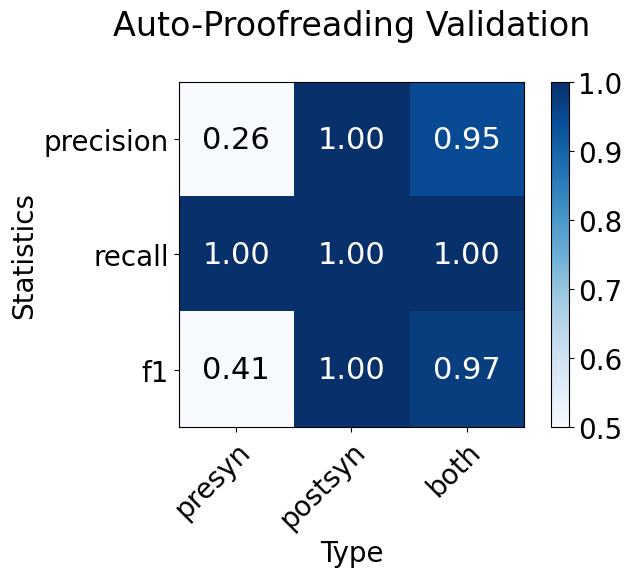

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136618412685_validation_df.pbz2
File size is 0.03986 MB
Total time for neuron 864691136618412685: 49.10533165931702

--- Working on Neuron 864691136545546146 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 20, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 2855, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 2875
n_valid_syn_ids_presyn = 20
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 2855
n_errored_syn_ids_postsyn = 0
Segment Id = 864691136545546146
Postsyn counts:
TP:2854
TN:0
FP:1
FN:0
Presyn counts:
TP:20
TN:0
FP:0
FN:0


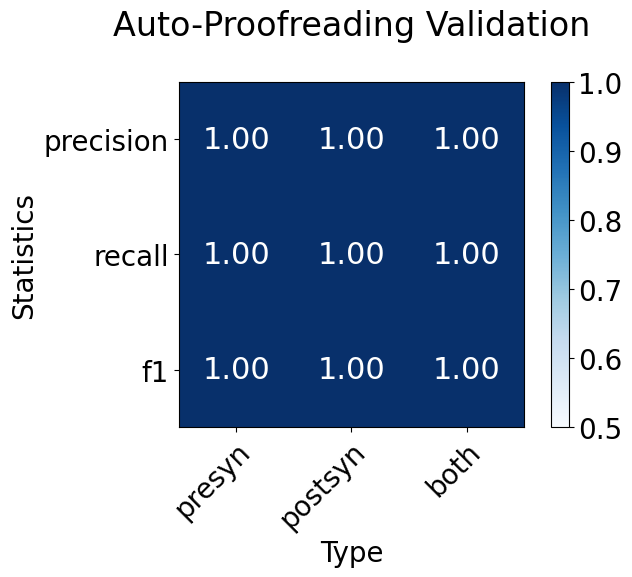

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136545546146_validation_df.pbz2
File size is 0.058727 MB
Total time for neuron 864691136545546146: 64.66880559921265

--- Working on Neuron 864691136537477538 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 76, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 6640, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 6716
n_valid_syn_ids_presyn = 76
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 6640
n_errored_syn_ids_postsyn = 0
Segment Id = 864691136537477538
Postsyn counts:
TP:6628
TN:0
FP:12
FN:0
Presyn counts:
TP:59
TN:0
FP:17
FN:0


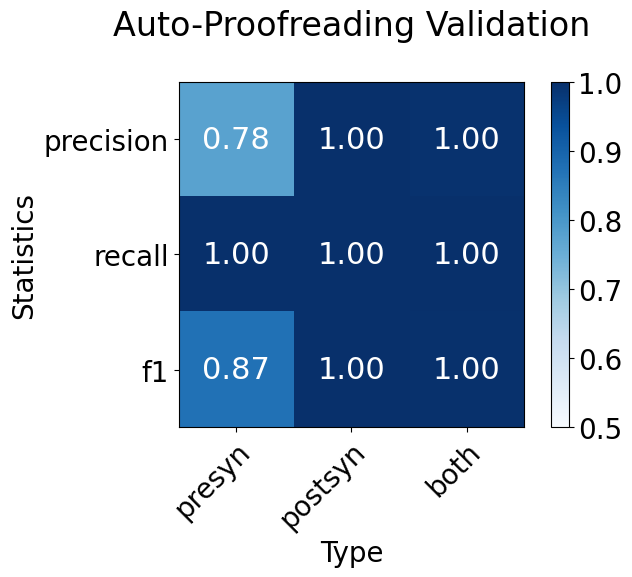

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136537477538_validation_df.pbz2
File size is 0.13334 MB
Total time for neuron 864691136537477538: 109.95407724380493

--- Working on Neuron 864691136105491417 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 154, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 2017, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 2171
n_valid_syn_ids_presyn = 154
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 2017
n_errored_syn_ids_postsyn = 0
Segment Id = 864691136105491417
Postsyn counts:
TP:2014
TN:0
FP:3
FN:0
Presyn counts:
TP:13
TN:0
FP:141
FN:0


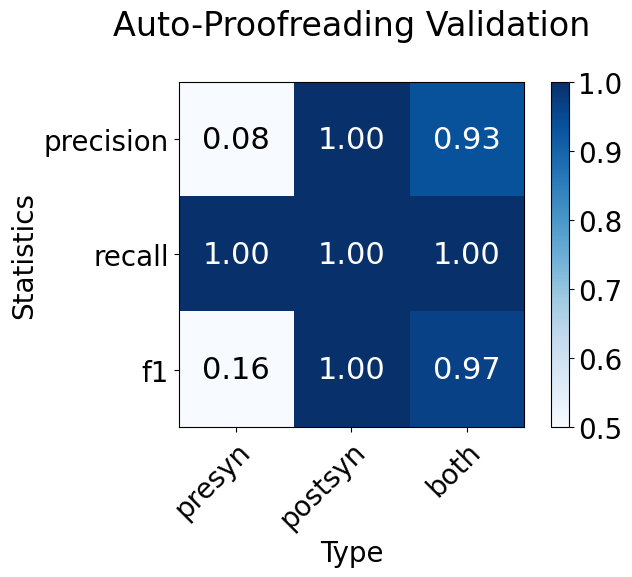

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136105491417_validation_df.pbz2
File size is 0.044976 MB
Total time for neuron 864691136105491417: 49.01696515083313

--- Working on Neuron 864691136056340440 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 107, # error synapses  = 1, # error presyns = 0
For postsyn: # valid synapses = 4750, # error synapses  = 504, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 5362
n_valid_syn_ids_presyn = 107
n_errored_syn_ids_presyn = 1
n_valid_syn_ids_postsyn = 4750
n_errored_syn_ids_postsyn = 504
Segment Id = 864691136056340440
Postsyn counts:
TP:4748
TN:0
FP:2
FN:504
Presyn counts:
TP:19
TN:0
FP:88
FN:1


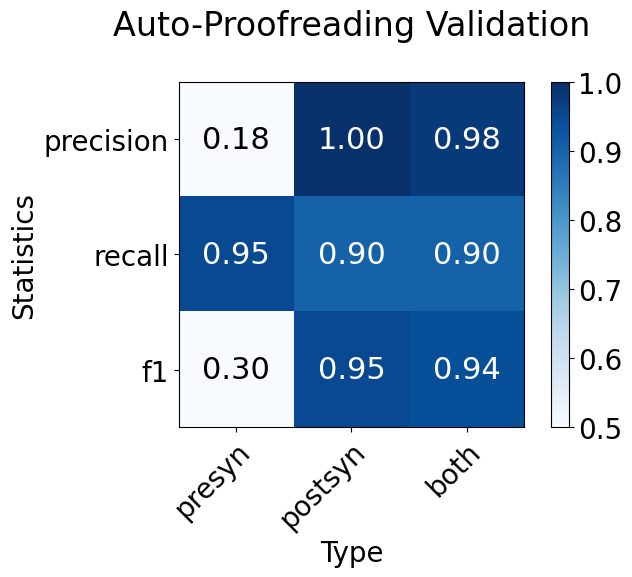

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136056340440_validation_df.pbz2
File size is 0.106297 MB
Total time for neuron 864691136056340440: 94.3319878578186


In [9]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = [],
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False,
                                                             apply_non_axon_presyn_errors = False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./baseline_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")